In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
from sklearn.metrics import r2_score

In [4]:
#Load data
df = pd.read_csv('Cumulate_Retention_Curve.csv', index_col = [0])

In [5]:
df.head()

,START_DATE,mon_diff,churn,churn_cumsum,new_user_count,cumulative_retention_rate
0,2015-01-01,0,3002,3002,6723,0.553473
1,2015-01-01,1,1127,4129,6723,0.385840
2,2015-01-01,2,627,4756,6723,0.292578
3,2015-01-01,3,295,5051,6723,0.248698
4,2015-01-01,4,195,5246,6723,0.219694


Three methods to predict:

For 0 and 1 month after cohort start date -> ARIMA

For 2, 3, and 4 months after cohort start date -> Moving Average

For >=5 months after cohort start date -> Average

In [6]:
#m=0
df0 = df[df['mon_diff']==0][['START_DATE','cumulative_retention_rate']]
df0_train = df0[df0['START_DATE'] < '2019-01-01']
df0_test = df0[df0['START_DATE'] >= '2019-01-01']
df0_train.head()

,START_DATE,cumulative_retention_rate
0,2015-01-01,0.553473
20,2015-02-01,0.692213
39,2015-03-01,0.696401
60,2015-04-01,0.706884
81,2015-05-01,0.683988


In [7]:
#Stationary Check
result=adfuller(df0_train['cumulative_retention_rate'])
print(f'ADF Statistics: {result[0]}')
print(f'p value {round(result[1],3)}')
print('critical values:')
for key, value in result[4].items():
    print(f'\t{key}: {round(value,3)}')

ADF Statistics: -1.7089885853741356
p value 0.426
critical values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


In [9]:
#Deal with non stationary (diff)
df0_train['cumulative_retention_rate'] = df0_train['cumulative_retention_rate'].diff(periods=1)
df0_train.dropna(inplace=True)

/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_58133/1700808926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0_train['cumulative_retention_rate'] = df0_train['cumulative_retention_rate'].diff(periods=1)
/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_58133/1700808926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0_train.dropna(inplace=True)


In [10]:
#Stationary Check
result=adfuller(df0_train['cumulative_retention_rate'])
print(f'ADF Statistics: {result[0]}')
print(f'p value {round(result[1],3)}')
print('critical values:')
for key, value in result[4].items():
    print(f'\t{key}: {round(value,3)}')

ADF Statistics: -8.031803003860274
p value 0.0
critical values:
	1%: -3.581
	5%: -2.927
	10%: -2.602


/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


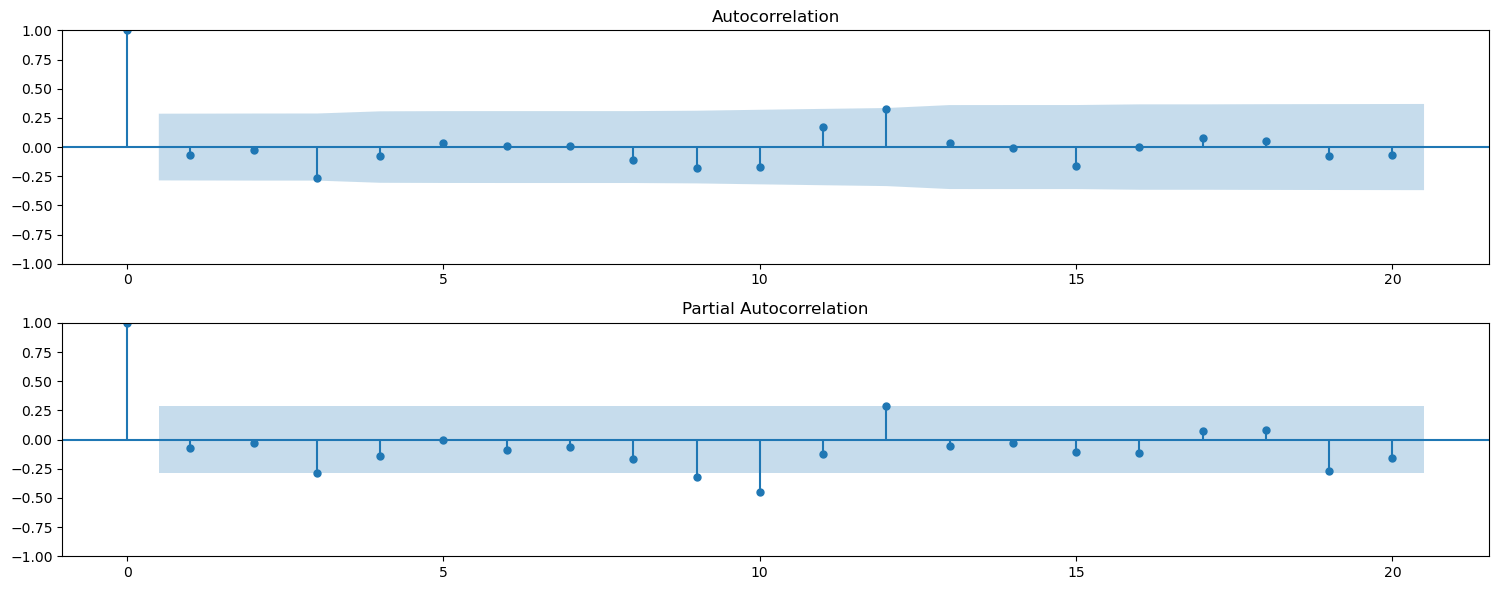

In [11]:
#Observe acf and pacf 
fig, ax = plt.subplots(2,1,figsize=(15,6))
plot_acf(df0_train['cumulative_retention_rate'], lags=20, alpha=0.05, ax=ax[0])
plot_pacf(df0_train['cumulative_retention_rate'], lags=20, alpha=0.05, ax=ax[1])
fig.tight_layout()
plt.show()

In [12]:
#ARIMA model
model0=sm.tsa.ARIMA(df0_train['cumulative_retention_rate'], order=(2,1,1))
result0=model0.fit()
result0.summary()

/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/U

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     cumulative_retention_rate   No. Observations:                   47
Model:                        ARIMA(2, 1, 1)   Log Likelihood                  78.754
Date:                       Fri, 10 Mar 2023   AIC                           -149.509
Time:                               19:20:29   BIC                           -142.194
Sample:                                    0   HQIC                          -146.769
                                        - 47                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0635      0.164     -0.386      0.699      -0.386       0.259
ar.L2         -0.0120      0.167     -0.072      0.943      -0.339       0.315
ma.L1         -0.9870      0.784     -1.259      0.208      -2.524       0.550
sigma2         0.0018      0.002      1.161      0.246      -0.001       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                 2.82
Prob(Q):                              0.44   Prob(JB):                         0.24
Heteroskedasticity (H):               0.09   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Prediction
forcast_value0 = result0.get_forecast(steps=12)
forcast_value0.summary_frame()

/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


cumulative_retention_rate,mean,mean_se,mean_ci_lower,mean_ci_upper
47,0.008526,0.042297,-0.074375,0.091428
48,0.007944,0.042323,-0.075008,0.090896
49,0.007858,0.042320,-0.075088,0.090804
50,0.007871,0.042325,-0.075084,0.090825
51,0.007871,0.042328,-0.075090,0.090831
52,0.007871,0.042331,-0.075096,0.090837
53,0.007871,0.042334,-0.075102,0.090843
54,0.007871,0.042337,-0.075108,0.090849
55,0.007871,0.042340,-0.075114,0.090855
56,0.007871,0.042343,-0.075120,0.090861


In [14]:
df0_test['cumulative_retention_rate'] = list(forcast_value0.predicted_mean)
df0_pred = df0_train.append(df0_test)

/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_58133/2583355518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0_test['cumulative_retention_rate'] = list(forcast_value0.predicted_mean)
/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_58133/2583355518.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df0_pred = df0_train.append(df0_test)


In [15]:
start_retention0 = df0[df0['START_DATE'] == '2015-01-01']['cumulative_retention_rate'][0]
df0_pred['0'] = df0_pred['cumulative_retention_rate'].cumsum() + start_retention0
df0_retention_pred = df0_pred.tail(12)[['START_DATE','0']]

In [16]:
df0_retention_pred['0'] = df0_retention_pred['0'].apply(lambda x: 1 if x>1 else x)

In [17]:
df0_retention_pred = df0_retention_pred.set_index('START_DATE')

In [18]:
df0_retention_pred.head()

,0
START_DATE,
2019-01-01,0.943097
2019-02-01,0.951041
2019-03-01,0.958899
2019-04-01,0.966770
2019-05-01,0.974641


In [19]:
#m=1
df1 = df[df['mon_diff']==1][['START_DATE','cumulative_retention_rate']]
df1_train = df1[df1['START_DATE'] < '2019-01-01']
df1_test = df1[df1['START_DATE'] >= '2019-01-01']
df1_train.head()

,START_DATE,cumulative_retention_rate
1,2015-01-01,0.385840
21,2015-02-01,0.509821
40,2015-03-01,0.553407
61,2015-04-01,0.565727
82,2015-05-01,0.533204


In [20]:
#Stationary Check
result=adfuller(df1_train['cumulative_retention_rate'])
print(f'ADF Statistics: {result[0]}')
print(f'p value {round(result[1],3)}')
print('critical values:')
for key, value in result[4].items():
    print(f'\t{key}: {round(value,3)}')

ADF Statistics: -1.751465646315563
p value 0.405
critical values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


In [21]:
#Deal with non stationary (diff)
df1_train['cumulative_retention_rate'] = df1_train['cumulative_retention_rate'].diff(periods=1)
df1_train.dropna(inplace=True)
df1_train.head()

/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_58133/1040650940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_train['cumulative_retention_rate'] = df1_train['cumulative_retention_rate'].diff(periods=1)
/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_58133/1040650940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_train.dropna(inplace=True)


,START_DATE,cumulative_retention_rate
21,2015-02-01,0.123981
40,2015-03-01,0.043586
61,2015-04-01,0.012319
82,2015-05-01,-0.032523
98,2015-06-01,-0.019537


In [22]:
#Stationary Check
result=adfuller(df1_train['cumulative_retention_rate'])
print(f'ADF Statistics: {result[0]}')
print(f'p value {round(result[1],3)}')
print('critical values:')
for key, value in result[4].items():
    print(f'\t{key}: {round(value,3)}')

ADF Statistics: -4.79553529422162
p value 0.0
critical values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


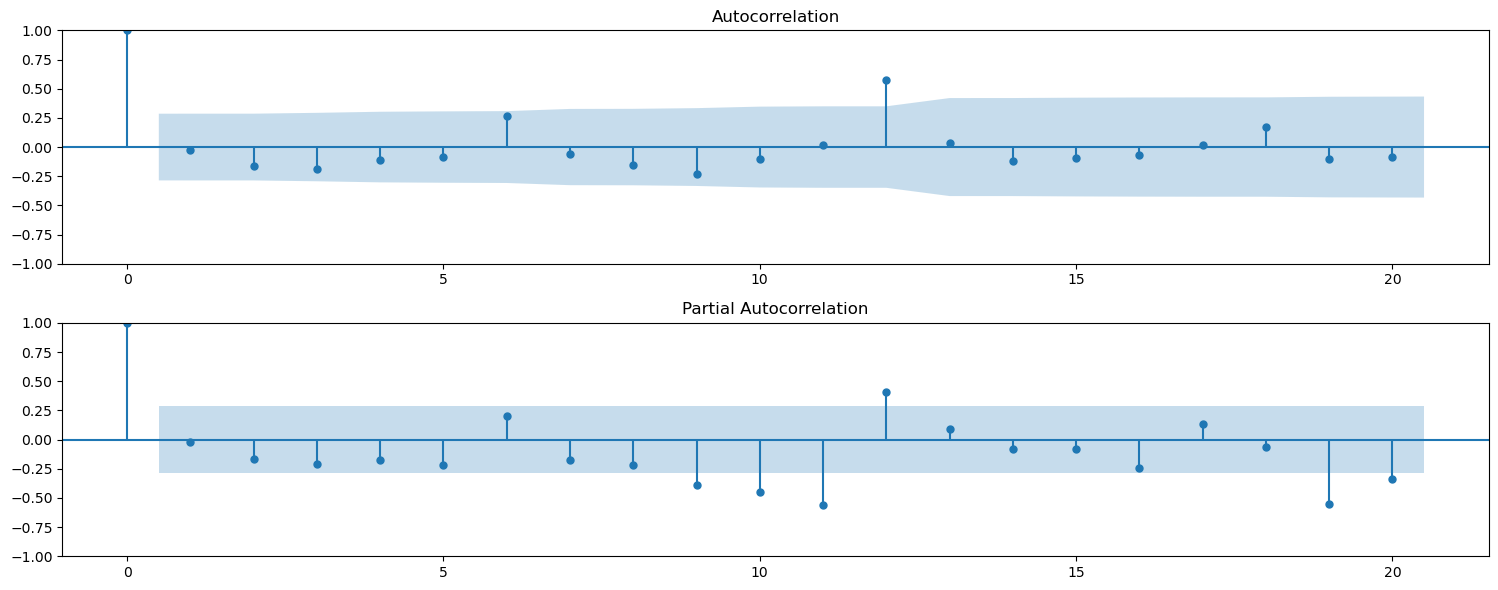

In [23]:
#Observe acf and pacf 
fig, ax = plt.subplots(2,1,figsize=(15,6))
plot_acf(df1_train['cumulative_retention_rate'], lags=20, alpha=0.05, ax=ax[0])
plot_pacf(df1_train['cumulative_retention_rate'], lags=20, alpha=0.05, ax=ax[1])
fig.tight_layout()
plt.show()

In [24]:
#ARIMA model
model1=sm.tsa.ARIMA(df1_train['cumulative_retention_rate'], order=(6,1,1))
result1=model1.fit()
result1.summary()

/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/U

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     cumulative_retention_rate   No. Observations:                   47
Model:                        ARIMA(6, 1, 1)   Log Likelihood                  68.866
Date:                       Fri, 10 Mar 2023   AIC                           -121.733
Time:                               19:20:35   BIC                           -107.103
Sample:                                    0   HQIC                          -116.252
                                        - 47                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0874      0.207     -0.421      0.674      -0.494       0.319
ar.L2         -0.2245      0.287     -0.783      0.433      -0.786       0.337
ar.L3         -0.2113      0.230     -0.921      0.357      -0.661       0.239
ar.L4         -0.1301      0.222     -0.585      0.559      -0.566       0.306
ar.L5         -0.1707      0.325     -0.526      0.599      -0.807       0.465
ar.L6          0.1974      0.274      0.720      0.472      -0.340       0.735
ma.L1         -0.9947      2.387     -0.417      0.677      -5.674       3.684
sigma2         0.0026      0.006      0.431      0.666      -0.009       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 6.63
Prob(Q):                              0.65   Prob(JB):                         0.04
Heteroskedasticity (H):               0.23   Skew:                            -0.66
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
#Prediction
forcast_value1 = result1.get_forecast(steps=12)
forcast_value1.summary_frame()

/Users/mingtsung/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


cumulative_retention_rate,mean,mean_se,mean_ci_lower,mean_ci_upper
47,0.009845,0.051494,-0.091081,0.110772
48,-0.007063,0.051592,-0.108182,0.094056
49,0.014799,0.052569,-0.088234,0.117831
50,0.018699,0.053185,-0.085541,0.122938
51,0.002332,0.053214,-0.101966,0.106630
52,0.007008,0.053301,-0.097461,0.111477
53,0.008947,0.055534,-0.099897,0.117791
54,0.003611,0.055608,-0.105379,0.112601
55,0.008432,0.055652,-0.100644,0.117507
56,0.011754,0.055757,-0.097528,0.121035


In [26]:
df1_test['cumulative_retention_rate'] = list(forcast_value1.predicted_mean)
df1_pred = df1_train.append(df1_test)

/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_58133/2506165266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test['cumulative_retention_rate'] = list(forcast_value1.predicted_mean)
/var/folders/n9/t_j1751j2636q1vf1wsyppsw0000gn/T/ipykernel_58133/2506165266.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1_pred = df1_train.append(df1_test)


In [27]:
start_retention1 = df1[df1['START_DATE'] == '2015-01-01']['cumulative_retention_rate'][1]
df1_pred['1'] = df1_pred['cumulative_retention_rate'].cumsum() + start_retention1
df1_retention_pred = df1_pred.tail(12)[['START_DATE','1']]

In [28]:
df1_retention_pred.set_index('START_DATE',inplace=True)

In [29]:
df1_retention_pred.head()

,1
START_DATE,
2019-01-01,0.827405
2019-02-01,0.820342
2019-03-01,0.835141
2019-04-01,0.853839
2019-05-01,0.856171


In [30]:
#Combine the result of m=0 and m=1
pred_df = pd.merge(df0_retention_pred, df1_retention_pred, how='inner', left_on=['START_DATE'], right_on = ['START_DATE'])

In [31]:
#m=2
#Calculate Moveing Average
df2 = df[df['mon_diff']==2][['START_DATE','cumulative_retention_rate']]
df2_201501_201601 = df2[df2['START_DATE']<'2016-01-01']
df2_201601_201701 = df2[(df2['START_DATE']>='2016-01-01') & (df2['START_DATE']<'2017-01-01')]
df2_avg_2015 = df2_201501_201601['cumulative_retention_rate'].mean()
df2_avg_2016 = df2_201601_201701['cumulative_retention_rate'].mean()
mov_avg_2 = df2_avg_2016-df2_avg_2015

In [32]:
df2_train = df2[(df2['START_DATE'] < '2017-01-01') & (df2['START_DATE'] >= '2016-01-01')]

In [33]:
#Prediction
m2=[]
for i in df2_train.cumulative_retention_rate:
    m2.append(3*mov_avg_2+i)

In [34]:
pred_df['2']=m2

In [35]:
pred_df

,0,1,2
START_DATE,,,
2019-01-01,0.943097,0.827405,0.534956
2019-02-01,0.951041,0.820342,0.657361
2019-03-01,0.958899,0.835141,0.684627
2019-04-01,0.966770,0.853839,0.684266
2019-05-01,0.974641,0.856171,0.646666
2019-06-01,0.982512,0.863179,0.619357
2019-07-01,0.990382,0.872126,0.619960
2019-08-01,0.998253,0.875737,0.611750
2019-09-01,1.000000,0.884168,0.665598


In [36]:
#m=3
#Calculate Moveing Average
df3 = df[df['mon_diff']==3][['START_DATE','cumulative_retention_rate']]
df3_201501_201601 = df3[df3['START_DATE']<'2016-01-01']
df3_201601_201701 = df3[(df3['START_DATE']>='2016-01-01') & (df3['START_DATE']<'2017-01-01')]
df3_avg_2015 = df3_201501_201601['cumulative_retention_rate'].mean()
df3_avg_2016 = df3_201601_201701['cumulative_retention_rate'].mean()
mov_avg_3 = df3_avg_2016-df3_avg_2015

In [37]:
#Prediciton
df3_train = df3[(df3['START_DATE'] < '2017-01-01') & (df3['START_DATE'] >= '2016-01-01')]
m3=[]
for i in df3_train.cumulative_retention_rate:
    m3.append(3*mov_avg_3+i)

pred_df['3']=m3

In [38]:
#m=4
#Calculate Moveing Average
df4 = df[df['mon_diff']==4][['START_DATE','cumulative_retention_rate']]
df4_201501_201601 = df4[df4['START_DATE']<'2016-01-01']
df4_201601_201701 = df4[(df4['START_DATE']>='2016-01-01') & (df4['START_DATE']<'2017-01-01')]
df4_avg_2015 = df4_201501_201601['cumulative_retention_rate'].mean()
df4_avg_2016 = df4_201601_201701['cumulative_retention_rate'].mean()
mov_avg_4 = df4_avg_2016-df4_avg_2015

In [39]:
#Prediciton
df4_train = df4[(df4['START_DATE'] < '2017-01-01') & (df4['START_DATE'] >= '2016-01-01')]
m4=[]
for i in df4_train.cumulative_retention_rate:
    m4.append(3*mov_avg_4+i)

pred_df['4']=m4

In [40]:
#m=5
m5=[]
df5 = df[df['mon_diff']==5][['START_DATE','cumulative_retention_rate']]
df5['month'] = pd.to_datetime(df5['START_DATE']).dt.month

In [41]:
#Average
for i in range(1,13):
    df5_temp = df5[(df5['month'] == i) & (df5['START_DATE'] < '2017-04-01')]
    m5.append(df5_temp.cumulative_retention_rate.mean())
    
pred_df['5']=m5

In [42]:
#m=6
m6=[]
df6 = df[df['mon_diff']==6][['START_DATE','cumulative_retention_rate']]
df6['month'] = pd.to_datetime(df6['START_DATE']).dt.month

In [43]:
#Average
for i in range(1,13):
    df6_temp = df6[(df6['month'] == i) & (df6['START_DATE'] < '2017-04-01')]
    m6.append(df6_temp.cumulative_retention_rate.mean())
    
pred_df['6']=m6

In [44]:
#m=7
m7=[]
df7 = df[df['mon_diff']==7][['START_DATE','cumulative_retention_rate']]
df7['month'] = pd.to_datetime(df7['START_DATE']).dt.month

In [45]:
#Average
for i in range(1,13):
    df7_temp = df7[(df7['month'] == i) & (df7['START_DATE'] < '2017-04-01')]
    m7.append(df7_temp.cumulative_retention_rate.mean())
    
pred_df['7']=m7

In [46]:
#m=8
m8=[]
df8 = df[df['mon_diff']==8][['START_DATE','cumulative_retention_rate']]
df8['month'] = pd.to_datetime(df8['START_DATE']).dt.month

In [47]:
#Average
for i in range(1,13):
    df8_temp = df8[(df8['month'] == i) & (df8['START_DATE'] < '2017-04-01')]
    m8.append(df8_temp.cumulative_retention_rate.mean())
    
pred_df['8']=m8

In [48]:
#m=9
m9=[]
df9 = df[df['mon_diff']==9][['START_DATE','cumulative_retention_rate']]
df9['month'] = pd.to_datetime(df9['START_DATE']).dt.month

In [49]:
#Average
for i in range(1,13):
    df9_temp = df9[(df9['month'] == i) & (df9['START_DATE'] < '2017-04-01')]
    m9.append(df9_temp.cumulative_retention_rate.mean())
    
pred_df['9']=m9

In [50]:
#m=10
m10=[]
df10 = df[df['mon_diff']==10][['START_DATE','cumulative_retention_rate']]
df10['month'] = pd.to_datetime(df10['START_DATE']).dt.month

In [51]:
#Average
for i in range(1,13):
    df10_temp = df10[(df10['month'] == i) & (df10['START_DATE'] < '2017-04-01')]
    m10.append(df10_temp.cumulative_retention_rate.mean())
    
pred_df['10']=m10

In [52]:
#m=11
m11=[]
df11 = df[df['mon_diff']==11][['START_DATE','cumulative_retention_rate']]
df11['month'] = pd.to_datetime(df11['START_DATE']).dt.month

In [53]:
#Average
for i in range(1,13):
    df11_temp = df11[(df11['month'] == i) & (df11['START_DATE'] < '2017-04-01')]
    m11.append(df11_temp.cumulative_retention_rate.mean())
    
pred_df['11']=m11

In [54]:
#m=11
m12=[]
df12 = df[df['mon_diff']==12][['START_DATE','cumulative_retention_rate']]
df12['month'] = pd.to_datetime(df12['START_DATE']).dt.month

In [55]:
#Average
for i in range(1,13):
    df12_temp = df12[(df12['month'] == i) & (df12['START_DATE'] < '2017-04-01')]
    m12.append(df12_temp.cumulative_retention_rate.mean())
    
pred_df['12']=m12

In [56]:
pred_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
START_DATE,,,,,,,,,,,,,
2019-01-01,0.943097,0.827405,0.534956,0.478039,0.433965,0.115010,0.068034,0.061039,0.056940,0.053849,0.035005,0.006419,0.002534
2019-02-01,0.951041,0.820342,0.657361,0.596335,0.531432,0.132711,0.072298,0.064230,0.059803,0.055990,0.036745,0.011082,0.005658
2019-03-01,0.958899,0.835141,0.684627,0.612982,0.553158,0.154312,0.081127,0.075064,0.069873,0.056243,0.039372,0.013562,0.004851
2019-04-01,0.966770,0.853839,0.684266,0.616788,0.556197,0.142511,0.082242,0.073262,0.063284,0.054096,0.040569,0.008273,0.001414
2019-05-01,0.974641,0.856171,0.646666,0.583800,0.525910,0.125272,0.064839,0.053637,0.044932,0.040243,0.032130,0.006705,0.001080
2019-06-01,0.982512,0.863179,0.619357,0.561537,0.506420,0.123533,0.047467,0.037344,0.032462,0.028863,0.023170,0.004961,0.001613
2019-07-01,0.990382,0.872126,0.619960,0.567793,0.504840,0.094460,0.044928,0.039028,0.031812,0.028178,0.021800,0.005753,0.002131
2019-08-01,0.998253,0.875737,0.611750,0.541678,0.451165,0.088883,0.046457,0.040889,0.037798,0.034546,0.027227,0.008162,0.001990
2019-09-01,1.000000,0.884168,0.665598,0.554633,0.469045,0.133544,0.072485,0.065227,0.061578,0.059129,0.048179,0.005566,0.001575


Text(0, 0.5, 'Cumulative Retention Rate')

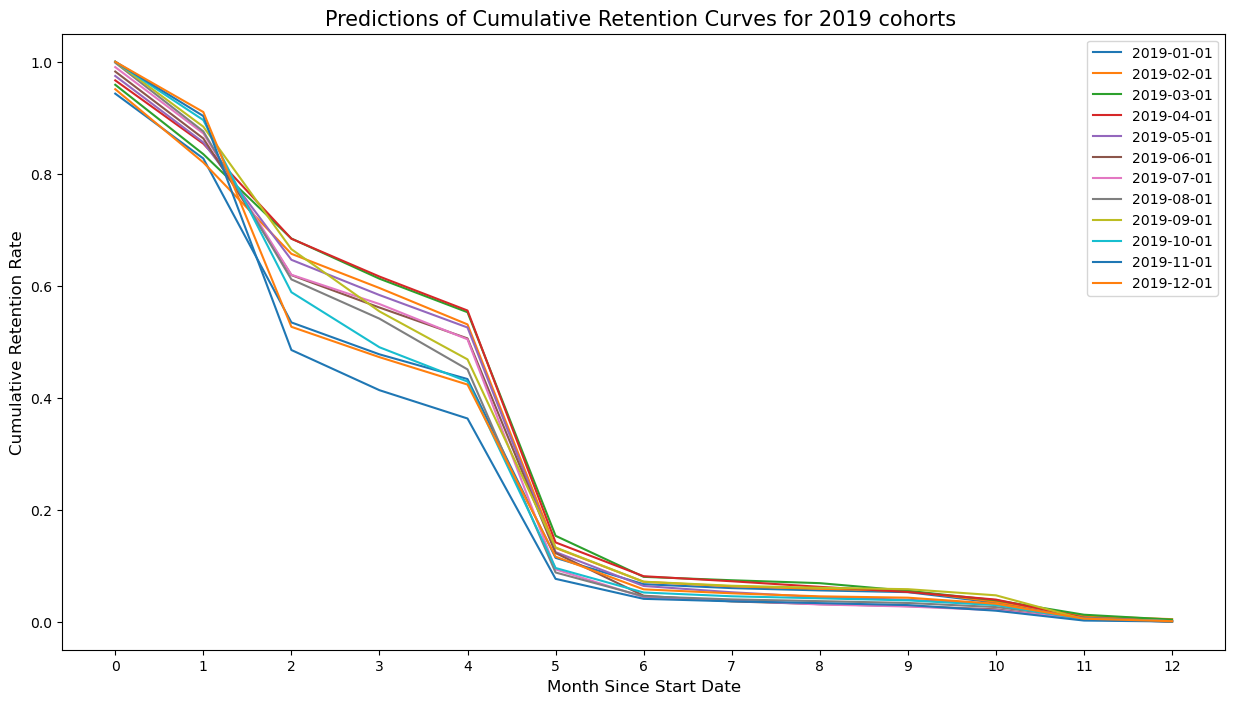

In [57]:
#Plot prediction
fig, ax = plt.subplots(figsize = (15,8))
for m in pred_df.index:
    sns.lineplot(data=pred_df.loc[m], ax=ax, label=m)
ax.set_title('Predictions of Cumulative Retention Curves for 2019 cohorts ', fontsize=15)
ax.set_xlabel('Month Since Start Date', fontsize=12)
ax.set_ylabel('Cumulative Retention Rate', fontsize=12)

Text(0.5, 0.98, 'Actual and Predict Cumulative Retention Curves of First 3 Cohorts in 2019.')

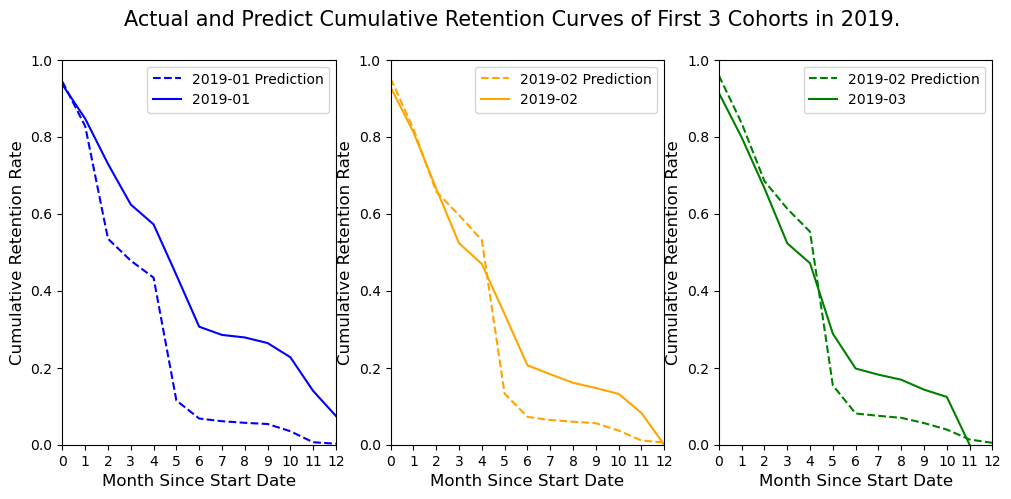

In [58]:
#Compare with actual Cumulative Retention Curves
fig, axes = plt.subplots(1, 3, figsize = (12,5))
sns.lineplot(data=pred_df.loc['2019-01-01'], ax=axes[0], label='2019-01 Prediction', color='blue', linestyle='--')
sns.lineplot(data=pred_df.loc['2019-02-01'], ax=axes[1], label='2019-02 Prediction', color='orange', linestyle='--')
sns.lineplot(data=pred_df.loc['2019-03-01'], ax=axes[2], label='2019-02 Prediction', color='green', linestyle='--')
sns.lineplot(data=df[df['START_DATE'] == '2019-01-01'], x='mon_diff', y='cumulative_retention_rate', ax=axes[0], label='2019-01', color='blue')
sns.lineplot(data=df[df['START_DATE'] == '2019-02-01'], x='mon_diff', y='cumulative_retention_rate', ax=axes[1], label='2019-02', color='orange')
sns.lineplot(data=df[df['START_DATE'] == '2019-03-01'], x='mon_diff', y='cumulative_retention_rate', ax=axes[2], label='2019-03', color='green')
for c in range(3):
    axes[c].set_xlim([0, 12])
    axes[c].set_ylim([0, 1])
    axes[c].set_xlabel('Month Since Start Date', fontsize=12)
    axes[c].set_ylabel('Cumulative Retention Rate', fontsize=12)
plt.suptitle('Actual and Predict Cumulative Retention Curves of First 3 Cohorts in 2019.', fontsize=15)

In [59]:
#Evaluate
r_score_list=[]
for j in pred_df.index:
    pred = pred_df.loc[j]
    true = df[df['START_DATE'] == j]['cumulative_retention_rate']
    length = 0
    if len(pred) <= len(true):
        length = len(pred)
    else:
        length = len(true)
    r_score_list.append(r2_score(pred[:length],true[:length]))

In [60]:
r_score_list

[0.6574792238804694,
 0.9193517997809562,
 0.9378939126641082,
 0.9207367473284509,
 0.9672792406017515,
 0.9435577685397333,
 0.9567921132206357,
 0.9492586640892486,
 0.8641122247629316,
 0.19923989617628723,
 0.22285444849745695,
 -1.3938248042815071]

In [61]:
r2_df = pd.DataFrame(r_score_list, columns = ['R Square Score'])
r2_df.reset_index(inplace=True)

In [62]:
mon_list=[]
for k in pred_df.index:
    mon_list.append(str(k)[:7])
r2_df['Month']=mon_list
r2_df

,index,R Square Score,Month
0,0,0.657479,2019-01
1,1,0.919352,2019-02
2,2,0.937894,2019-03
3,3,0.920737,2019-04
4,4,0.967279,2019-05
5,5,0.943558,2019-06
6,6,0.956792,2019-07
7,7,0.949259,2019-08
8,8,0.864112,2019-09
9,9,0.199240,2019-10


Text(0.5, 1.0, 'Prediction Accuracy of Cumulative Retention Curve for 2019 Cohorts')

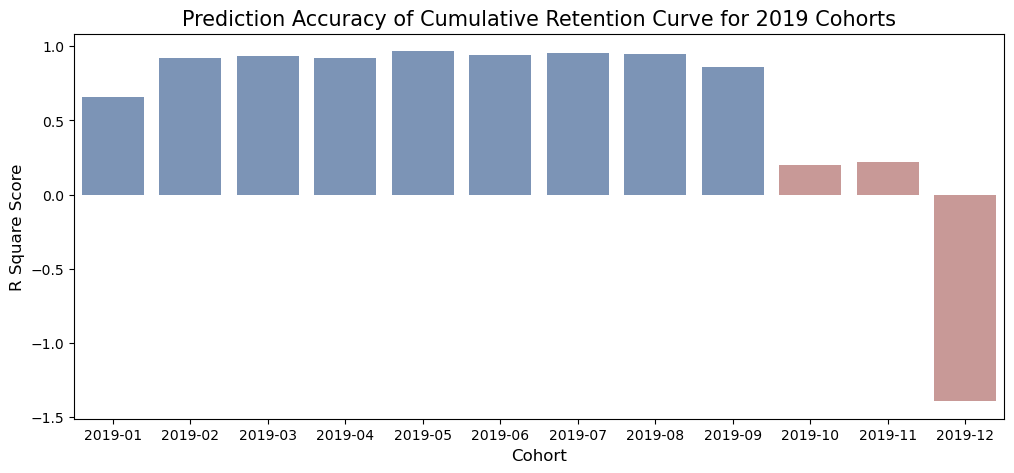

In [63]:
#Plot accuracy
temp = r2_df.set_index('Month')
temp.drop('index', axis = 1, inplace=True)

ll = []
for i in temp['R Square Score']:
    if i>0.5:
        ll.append(10)
    else:
        ll.append(-10)

temp['cat'] = ll
temp.drop('R Square Score', axis = 1, inplace=True)
rank = temp.squeeze()
pal = sns.color_palette("vlag", len(temp))
fig, ax = plt.subplots(figsize = (12,5))
sns.barplot(data=r2_df, x='Month', y='R Square Score', palette=np.array(pal[::-1])[rank])
ax.set_xlabel('Cohort', fontsize = 12)
ax.set_ylabel('R Square Score', fontsize = 12)
ax.set_title('Prediction Accuracy of Cumulative Retention Curve for 2019 Cohorts', fontsize = 15)